In [2]:
import torch
from torch import nn

In [3]:
#set mse loss

import torch.nn as nn
torch.random.manual_seed(11785)

loss = nn.MSELoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5)
output = loss(input, target)

output.backward()
print(output, input.grad)



tensor(2.8122, grad_fn=<MseLossBackward0>) tensor([[ 0.1489, -0.4266,  0.4605, -0.0318, -0.0989],
        [-0.1532,  0.3122, -0.0547, -0.2333,  0.0392],
        [ 0.1239,  0.1491, -0.2590, -0.0149, -0.1950]])


In [4]:
# set mse loss from nn.functional

import torch.nn.functional as F
torch.random.manual_seed(11785)

input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5)
output = F.mse_loss(input, target)
output.backward()
print(output, input.grad)

tensor(2.8122, grad_fn=<MseLossBackward0>) tensor([[ 0.1489, -0.4266,  0.4605, -0.0318, -0.0989],
        [-0.1532,  0.3122, -0.0547, -0.2333,  0.0392],
        [ 0.1239,  0.1491, -0.2590, -0.0149, -0.1950]])


In [6]:
#set cosine embedding loss (cosine similarity)
torch.random.manual_seed(11875)

loss = nn.CosineEmbeddingLoss()
input1 = torch.randn(1, 5, requires_grad=True)
input2 = torch.randn(1, 5, requires_grad=True)
target = torch.tensor([1])

output = loss(input1, input2, target)
output.backward()

output_same = loss(input1, input1, target)
output_same.backward()
print(output, output_same)

tensor(0.4074, grad_fn=<MeanBackward0>) tensor(0., grad_fn=<MeanBackward0>)


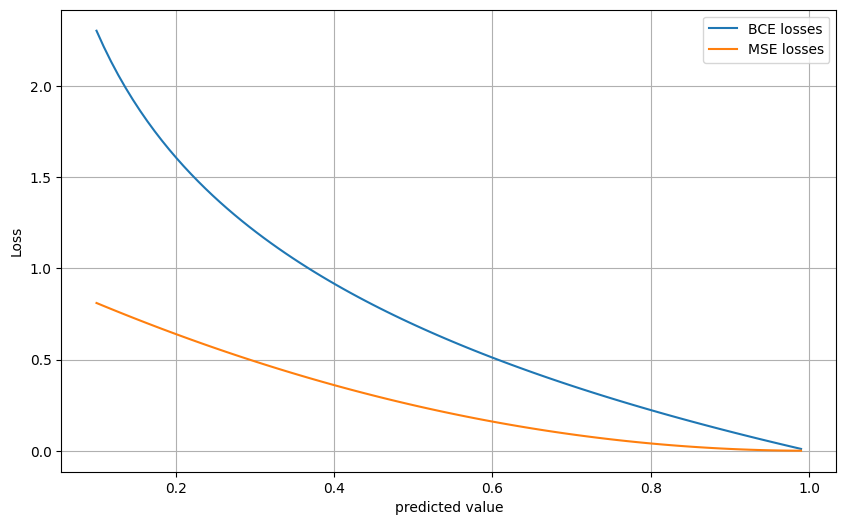

In [9]:
#visualize the differences between loss functions
#binary cross entropy vs mse loss

import torch, torch.nn, matplotlib.pyplot as plt, numpy as np

bce_loss = nn.BCELoss()
mse_loss = nn.MSELoss()

predictions = torch.linspace(0.1, 0.99, 98)
target = torch.ones(100)

bce_losses = [bce_loss(torch.tensor([pred]), torch.tensor([1.0])).item() for pred in predictions]
mse_losses = [mse_loss(torch.tensor([pred]), torch.tensor([1.0])).item() for pred in predictions]

plt.figure(figsize=(10, 6))
plt.plot(predictions.numpy(), bce_losses, label="BCE losses")
plt.plot(predictions.numpy(), mse_losses, label="MSE losses")
plt.xlabel("predicted value")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

### Implement custom loss functions

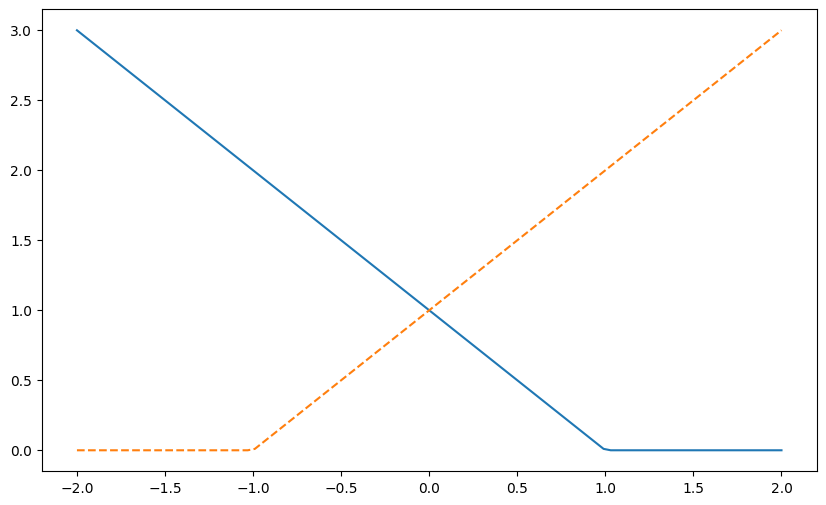

In [14]:
# hinge loss
import torch, matplotlib.pyplot as plt, numpy as np

def hinge_loss_manaal(y_pred, y_true):
    return torch.mean(torch.max(torch.zeros_like(y_pred), 1 - y_true * y_pred))

predicted_values = torch.linspace(-2, 2, 100)

target_1 = torch.ones_like(predicted_values)
loss_values_manual_1 = torch.zeros_like(predicted_values)
for i in range(len(predicted_values)):
    loss_values_manual_1[i] = hinge_loss_manaal(predicted_values[i:i+1], target_1[i:i+1])

target_minus_1 = -torch.ones_like(predicted_values)
loss_values_manual_minus_1 = torch.zeros_like(predicted_values)

for i in range(len(predicted_values)):
    loss_values_manual_minus_1[i] = hinge_loss_manaal(predicted_values[i:i+1], target_minus_1[i:i+1])

plt.figure(figsize=(10, 6))
plt.plot(predicted_values.numpy(), loss_values_manual_1.numpy(), label="Hinge loss tarege = 1")
plt.plot(predicted_values.numpy(), loss_values_manual_minus_1.numpy(), label="Hinge loss tarege = 1", linestyle="--")


/var/folders/41/f2g8g_gx5mxdj1zjg_yp7_c40000gn/T/ipykernel_9819/2206033043.py:5: RuntimeWarning: divide by zero encountered in log
  return -alpha * np.log(pt)
/var/folders/41/f2g8g_gx5mxdj1zjg_yp7_c40000gn/T/ipykernel_9819/2206033043.py:8: RuntimeWarning: divide by zero encountered in log
  return -alpha * (1-pt) ** gamma * np.log(pt)


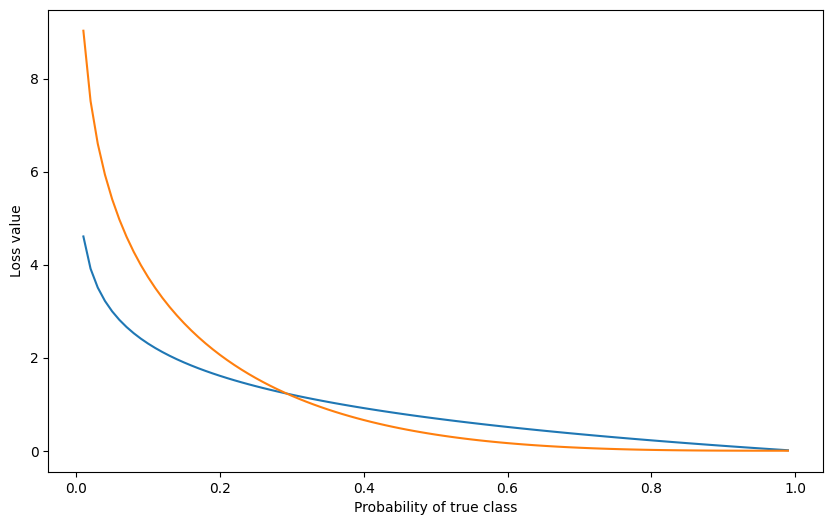

In [19]:
#writing customs functions - focal loss --> good for inbalanced datasets
import numpy as np, matplotlib.pyplot as plt

def binary_cross_entropy(pt, alpha=1):
    return -alpha * np.log(pt)

def focal_loss(pt, gamma=2, alpha=1):
    return -alpha * (1-pt) ** gamma * np.log(pt)

pt = np.linspace(0.0, 0.99, 100)

bce_loss = binary_cross_entropy(pt)
gamma = 2
fl_loss = focal_loss(pt, gamma=gamma, alpha=gamma)

plt.figure(figsize=(10, 6))
plt.plot(pt, bce_loss, label="Binary csross entropy")
plt.plot(pt, fl_loss, label="focal loss")
plt.xlabel("Probability of true class")
plt.ylabel("Loss value")
plt.show()

/var/folders/41/f2g8g_gx5mxdj1zjg_yp7_c40000gn/T/ipykernel_9819/2206033043.py:8: RuntimeWarning: divide by zero encountered in log
  return -alpha * (1-pt) ** gamma * np.log(pt)


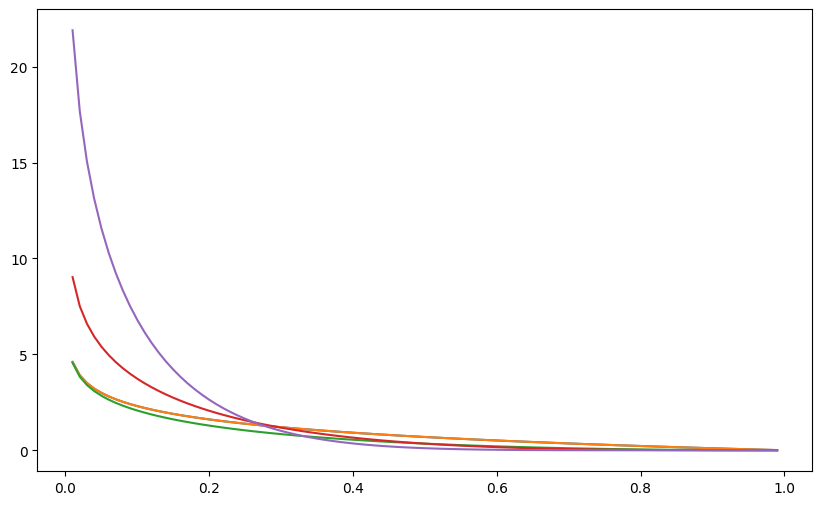

In [20]:
gammas = [0, 1, 2, 5]
losses = {gamma: focal_loss(pt, gamma=gamma, alpha = gamma if gamma != 0 else 1) for gamma in gammas}

plt.figure(figsize=(10, 6))
plt.plot(pt, bce_loss, label = "Binary Cross Entropy")

for gamma, loss in losses.items():
    plt.plot(pt, loss, label=f"Focal loss gamma: {gamma}")

plt.show()

### CTC loss -> for sequence to sequence when lenght are different

In [ ]:
import torch, torch.nn as nn

torch.manuaL_seed(42)

